# LINEAR REGRESSION

### Abdullah MEMISOGLU

In [2]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [5]:
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of Houses')

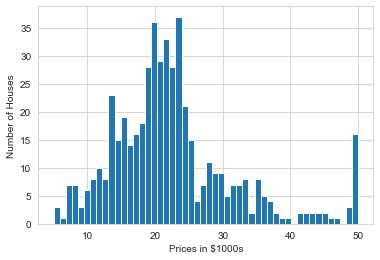

In [7]:
plt.hist(boston.target, bins = 50)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of Houses')

Text(0.5, 0, 'Number of Rooms')

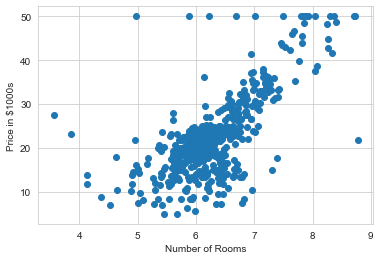

In [9]:
plt.scatter(boston.data[:,5], boston.target)

plt.ylabel('Price in $1000s')
plt.xlabel('Number of Rooms')

In [11]:
boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names 

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
boston_df['Price'] = boston.target

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


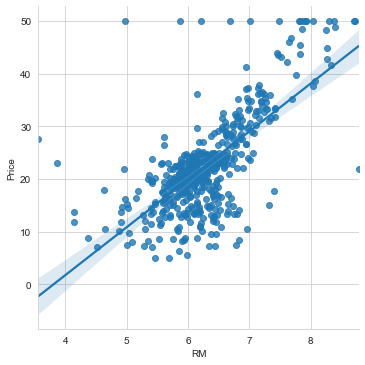

In [13]:
sns.lmplot(x = 'RM', y = 'Price', data = boston_df)

In [83]:
X = np.vstack(boston_df.RM)

X = np.array([[value, 1] for value in X], dtype=float)
# It is for using the X array in the linear algebra -> np.linalg.lstsq
X

array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

In [92]:
Y = boston_df.Price
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [88]:
m, b = np.linalg.lstsq(X,Y, rcond = -1)[0]

# The output is the coefficients like mx + b

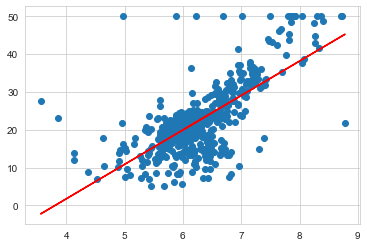

In [91]:
plt.plot(boston_df.RM, boston_df.Price,'o')

x = boston_df.RM

plt.plot(x, m*x + b, 'r', label = 'Best Fit Line')

In [93]:
# ERROR CALCULATION 
result = np.linalg.lstsq(X,Y,rcond = -1)

error_total = result[1]

rmse = np.sqrt(error_total / len(X))

print("The root mean square error was %.2f" %rmse)

The root mean square error was 6.60


In [94]:
import sklearn 
from sklearn.linear_model import LinearRegression

In [95]:
lreg = LinearRegression()

In [96]:
x_multi = boston_df.drop('Price', 1)

Y_target = boston_df.Price

In [97]:
lreg.fit(x_multi, Y_target)

LinearRegression()

In [98]:
print("The estimated intercept coef is %.2f" %lreg.intercept_)

print("The number of coefs used was %d" %len(lreg.coef_))

The estimated intercept coef is 36.46
The number of coefs used was 13


In [100]:
coeff_df = DataFrame(boston_df.columns)

coeff_df.columns = ['Features']

coeff_df['Coefficitent Estimate'] = Series(lreg.coef_)

coeff_df


,Features,Coefficitent Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [103]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,boston_df.Price)

In [105]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [106]:
lreg = LinearRegression()

lreg.fit(X_train, Y_train)

LinearRegression()

In [108]:
pred_train = lreg.predict(X_train)

pred_test = lreg.predict(X_test)

In [110]:
print("Fit a model X_train, and calculate the Mean Squared Error with Y_train: %.2f" %np.mean((Y_train - pred_train)**2))
print("Fit a model X_test, and calculate the Mean Squared Error with Y_test: %.2f" %np.mean((Y_test - pred_test)**2))

Fit a model X_train, and calculate the Mean Squared Error with Y_train: 40.53
Fit a model X_test, and calculate the Mean Squared Error with Y_test: 52.83


Text(0.5, 1.0, 'Residual Plots')

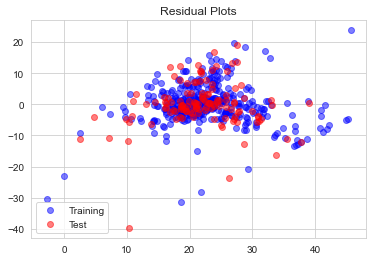

In [111]:
train = plt.scatter(pred_train,(pred_train - Y_train), c = 'b', alpha = 0.5)

test = plt.scatter(pred_test, (pred_test - Y_test), c = 'r', alpha = 0.5)

plt.hlines( y = 0, xmin = 10, xmax = 10)

plt. legend((train, test), ('Training', 'Test'), loc = 'lower left')

plt.title('Residual Plots')